In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
IQ_train_df = pd.read_csv('train.csv')
IQ_train_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
IQ_train_df.shape

(9557, 143)

We have 9557 records with 143 columns.

### task 1: Identify the output variable

Target column is the output variable.

We can use y = IQ_train_df['target'] later.

### Task 2: Understand the type of data.

In [4]:
IQ_train_df.dtypes.value_counts()

int64      130
float64      8
object       5
dtype: int64

There are 130 integer, 8 float and 5 object/string datatypes.

Lets find out the columns with datatype object.

In [5]:
IQ_train_df.columns[IQ_train_df.dtypes == 'object']

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

We can remove Id as it doesnt give any insights.

In [6]:
IQ_train_df.drop(['Id'], axis=1, inplace=True)

Lets check the object datatype data.

In [7]:
IQ_train_df[['idhogar', 'dependency', 'edjefe', 'edjefa']].head()

,idhogar,dependency,edjefe,edjefa
0,21eb7fcc1,no,10,no
1,0e5d7a658,8,12,no
2,2c7317ea8,8,no,11
3,2b58d945f,yes,11,no
4,2b58d945f,yes,11,no


In [8]:
IQ_train_df['idhogar'].value_counts()

fd8a6d014    13
0c7436de6    12
ae6cf0558    12
b7a0b59d7    11
3fe29a56b    11
             ..
3659d839d     1
d2e45f8ad     1
7c1cfa65c     1
3a3346eff     1
980b28caa     1
Name: idhogar, Length: 2988, dtype: int64

In [9]:
IQ_train_df[IQ_train_df['idhogar'] == 'fd8a6d014'].head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
2467,80000.0,1,4,1,1,1,0,NaN,5,2,...,49,256,169,0,81,18.777779,5.0625,16.0,256,1
2468,80000.0,1,4,1,1,1,0,NaN,5,2,...,0,0,169,0,81,18.777779,5.0625,16.0,0,1
2469,80000.0,1,4,1,1,1,0,NaN,5,2,...,4,81,169,0,81,18.777779,5.0625,16.0,81,1
2470,80000.0,1,4,1,1,1,0,NaN,5,2,...,0,25,169,0,81,18.777779,5.0625,16.0,25,1
2471,80000.0,1,4,1,1,1,0,NaN,5,2,...,36,196,169,0,81,18.777779,5.0625,16.0,196,1


We have lots ofstring values representing house id.

In [10]:
IQ_train_df['dependency'].value_counts()

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
.40000001      84
1.3333334      84
2.5            77
5              24
.80000001      18
1.25           18
3.5            18
2.25           13
.71428573      12
1.2            11
.22222222      11
.83333331      11
1.75           11
.2857143        9
.60000002       8
1.6666666       8
.16666667       7
6               7
Name: dependency, dtype: int64

There are few numeric values with two strings as yes and no. Here we can encode yes and no as 1 and 0 respectively.

In [11]:
IQ_train_df['edjefe'].value_counts()

no     3762
6      1845
11      751
9       486
3       307
15      285
8       257
7       234
5       222
14      208
17      202
2       194
4       137
16      134
yes     123
12      113
10      111
13      103
21       43
18       19
19       14
20        7
Name: edjefe, dtype: int64

In [12]:
IQ_train_df['edjefa'].value_counts()

no     6230
6       947
11      399
9       237
8       217
15      188
7       179
5       176
3       152
4       136
14      120
16      113
10       96
2        84
17       76
12       72
yes      69
13       52
21        5
19        4
18        3
20        2
Name: edjefa, dtype: int64

Similar to dependancy, we can encode for yes and no in the above two columns.

In [13]:
encode = {'yes': 1, 'no': 0}

IQ_train_df['dependency'].replace(encode, inplace=True)
IQ_train_df['edjefe'].replace(encode, inplace=True)
IQ_train_df['edjefa'].replace(encode, inplace=True)

In [14]:
IQ_train_df['edjefa'].unique()

array([0, '11', '4', '10', '9', '15', '7', '14', '13', '8', '17', '6',
       '5', '3', '16', '19', 1, '21', '12', '2', '20', '18'], dtype=object)

Now lets convert all the three columns to numeric as there is no yes and no values left.

In [15]:
IQ_train_df['dependency'] = pd.to_numeric(IQ_train_df['dependency'])
IQ_train_df['edjefe'] = pd.to_numeric(IQ_train_df['edjefe'])
IQ_train_df['edjefa'] = pd.to_numeric(IQ_train_df['edjefa'])

In [16]:
print(IQ_train_df['dependency'].dtype)
print(IQ_train_df['edjefe'].dtype)
print(IQ_train_df['edjefa'].dtype)

float64
int64
int64


### Task 3: Check if there are any biases in your dataset.

### Task 7: Count how many null values are existing in columns.
### Task 8: Remove null value rows of the target variable.

In [17]:
# Check Target column values
IQ_train_df['Target'].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

There are 4 poverty lavels (1,2,3,4). Its an imbalanced dataset as level 4 has more counts than others.

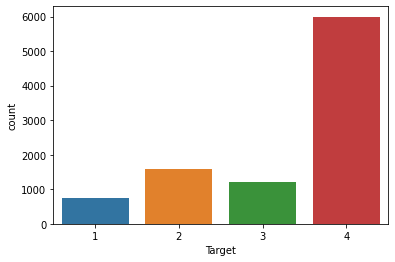

In [18]:
sns.countplot(IQ_train_df['Target'])
plt.show()

Lets do NaN check.

In [19]:
col_nan_counts = IQ_train_df.isna().sum()
col_nan_counts[col_nan_counts > 0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

Above 5 columns have NaN values. Total we have 9557 records. If few colums have large number of NaN values, its impossible to imput. We can drop those columns. For the columns with very less NaN values, we can do mean imputation.

In [20]:
IQ_train_df.drop(['v2a1', 'v18q1', 'rez_esc'], axis=1, inplace=True)

In [21]:
IQ_train_df['meaneduc'].fillna(IQ_train_df['meaneduc'].mean(), inplace=True)
IQ_train_df['SQBmeaned'].fillna(IQ_train_df['SQBmeaned'].mean(), inplace=True)

In [22]:
IQ_train_df.columns[IQ_train_df.isna().sum() > 0]

Index([], dtype='object')

Now we got rid of NaN values.

Lets check for columns with constant values or zero variance.

In [23]:
IQ_train_df.drop('idhogar', axis=1).columns[IQ_train_df.var() == 0]

Index(['elimbasu5'], dtype='object')

In [24]:
IQ_train_df['elimbasu5'].nunique()

1

We can remove the 'elimbasu5' column as it has only constant value.

In [25]:
IQ_train_df.drop(['elimbasu5'], axis=1, inplace=True)

In [26]:
len(IQ_train_df.columns)

138

We have 137 columns including the target column. Its not possible to to EDA for each column and use boxplot to detect outliers.

We can select 20 columns with high corelation with target variable and do EDA for them only.

In [27]:
corr = IQ_train_df.corr()

In [28]:
corr_cols = corr['Target'].sort_values(ascending=False)[1:21].index
corr_cols

Index(['meaneduc', 'cielorazo', 'escolari', 'SQBescolari', 'eviv3', 'epared3',
       'pisomoscer', 'SQBmeaned', 'paredblolad', 'etecho3', 'SQBedjefe',
       'edjefe', 'v18q', 'rooms', 'instlevel8', 'qmobilephone', 'computer',
       'lugar1', 'bedrooms', 'hogar_adul'],
      dtype='object')

In [29]:
cols_corr = IQ_train_df[corr_cols].corr()

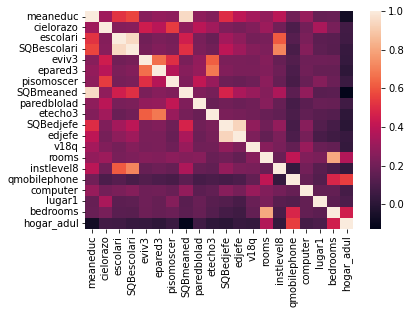

In [30]:
sns.heatmap(cols_corr)
plt.show()

We can see from the plot, multicolinearity is present in between few columns. So we can remove those.

In [31]:
# Delete cols with high correlation with selected columns.
def getColumnsToDelete(corr):
    cols_to_remove = set()
    for col in corr:
        if col not in cols_to_remove:
            delete_cols = corr[col][(corr[col] > 0.7) & (corr[col] < 1)].index.tolist()
            cols_to_remove.update(delete_cols)
    return cols_to_remove         

In [32]:
cols_to_remove = getColumnsToDelete(cols_corr)

In [33]:
keep_cols = corr_cols[~corr_cols.isin(cols_to_remove)].tolist()
len(keep_cols)

16

We can do EDA with these 16 columns.

In [34]:
col_nuq = IQ_train_df[keep_cols].nunique()
col_nuq

meaneduc        156
cielorazo         2
escolari         22
eviv3             2
epared3           2
pisomoscer        2
paredblolad       2
etecho3           2
SQBedjefe        22
v18q              2
rooms            11
instlevel8        2
qmobilephone     11
computer          2
lugar1            2
hogar_adul       10
dtype: int64

We have mostly integer values representing categorical values and float values representing continuous value.

In [35]:
def getHist(col):
    sns.histplot(IQ_train_df[col], kde=True)
    plt.show()

In [36]:
def getBox(col):
    sns.boxplot(IQ_train_df[col])
    plt.show()

Column: meaneduc EDA

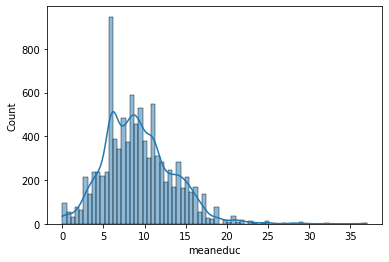

In [37]:
getHist('meaneduc')

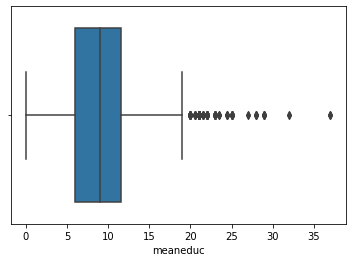

In [38]:
getBox('meaneduc')

There are lots of outliers. We can set limit as 19.

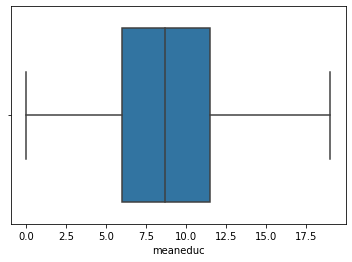

In [39]:
IQ_train_df = IQ_train_df[IQ_train_df['meaneduc'] <= 19]

getBox('meaneduc')

Column: escolari EDA

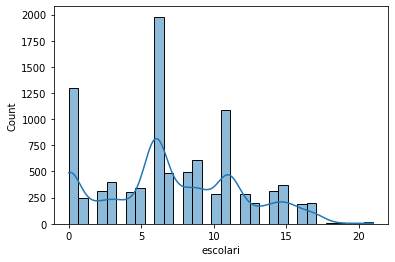

In [40]:
getHist('escolari')

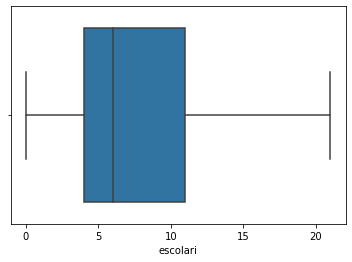

In [41]:
getBox('escolari')

There is no outlier.

Column: SQBedjefe EDA

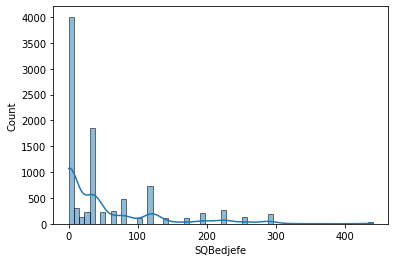

In [42]:
getHist('SQBedjefe')

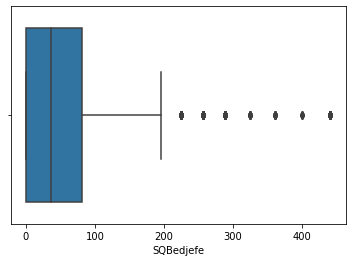

In [43]:
getBox('SQBedjefe')

There are few outliers. We can set limit as 200.

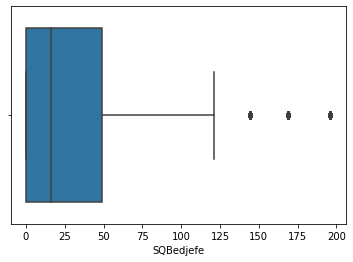

In [44]:
IQ_train_df = IQ_train_df[IQ_train_df['SQBedjefe'] <= 200]

getBox('SQBedjefe')

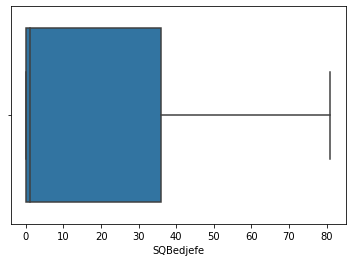

In [45]:
IQ_train_df = IQ_train_df[IQ_train_df['SQBedjefe'] <= 90]

getBox('SQBedjefe')

Outliers got removed by setting 90 as limit.

Column: rooms EDA

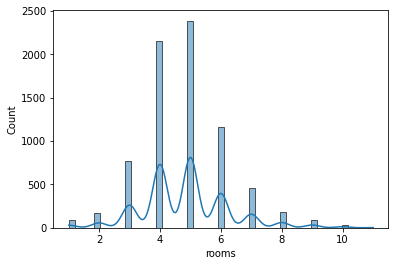

In [46]:
getHist('rooms')

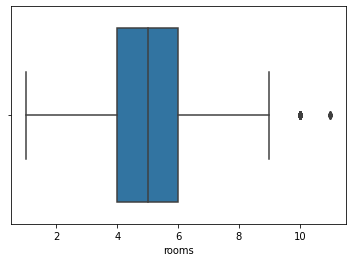

In [47]:
getBox('rooms')

There are two outliers. So we can set 9 as limit.

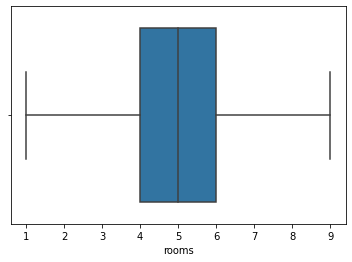

In [48]:
IQ_train_df = IQ_train_df[IQ_train_df['rooms'] <= 9]

getBox('rooms')

Column: qmobilephone EDA

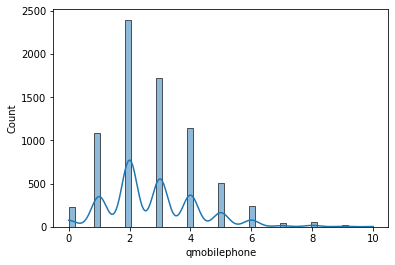

In [49]:
getHist('qmobilephone')

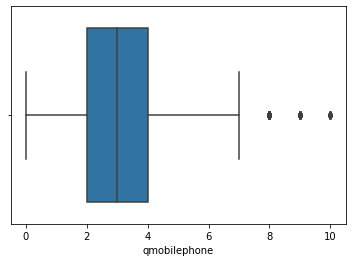

In [50]:
getBox('qmobilephone')

We can set 7 as limit here to remove the outliers.

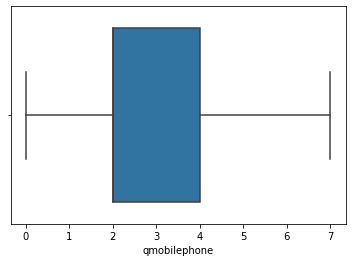

In [51]:
IQ_train_df = IQ_train_df[IQ_train_df['qmobilephone'] <= 7]

getBox('qmobilephone')

Column: hogar_adul EDA

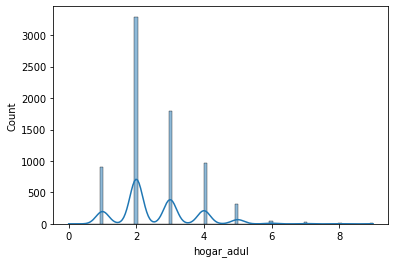

In [52]:
getHist('hogar_adul')

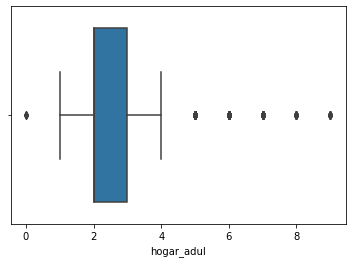

In [53]:
getBox('hogar_adul')

Here we need to set lower and upper limit as 1 and 4 respectively to get rid of outliers.

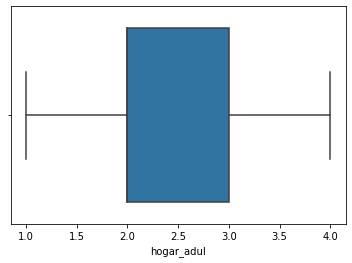

In [54]:
IQ_train_df = IQ_train_df[(IQ_train_df['hogar_adul'] >= 1) & (IQ_train_df['hogar_adul'] <= 4)]

getBox('hogar_adul')

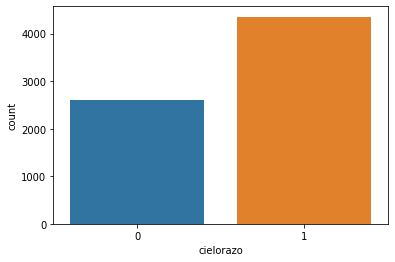

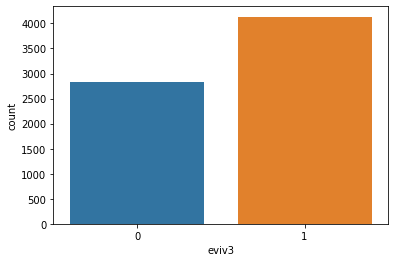

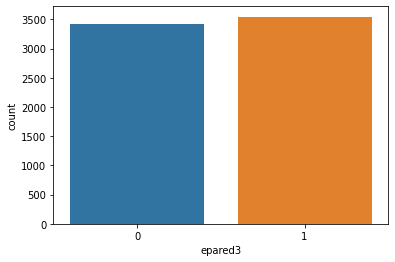

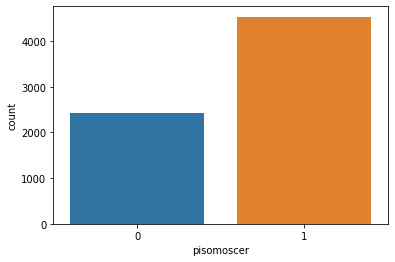

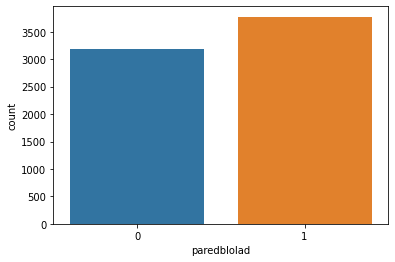

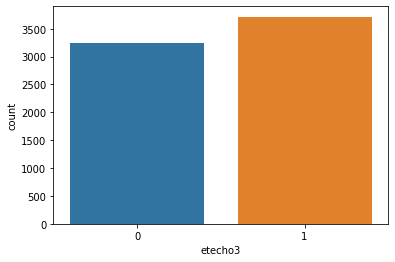

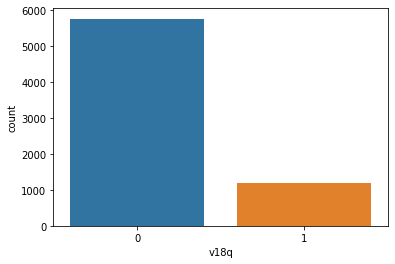

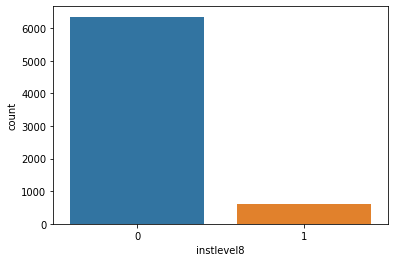

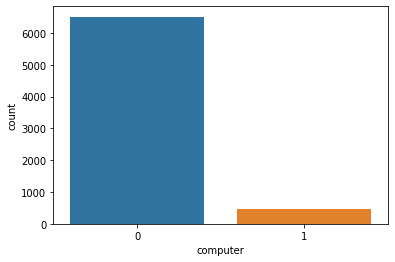

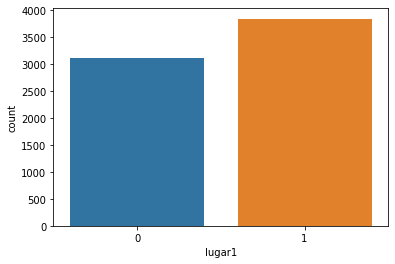

In [55]:
for index, val in zip(col_nuq.index, col_nuq):
    if val == 2:
        sns.countplot(IQ_train_df[index])
        plt.show()

We have reasonable values in the above columns, where for few columns, there are imbalance in its type. But its fine, we can keep it.

In [56]:
print('Final train data shape', IQ_train_df.shape)

Final train data shape (6963, 138)


Still we have enough records to train models.

### Task 4: Check whether all members of the house have the same poverty level.

In [57]:
per_house_uq_level = IQ_train_df.groupby('idhogar')['Target'].nunique()

In [58]:
per_house_uq_level[per_house_uq_level == 1].size / per_house_uq_level.size

0.9644602398933807

Only 96.44% household have all its members with same poverty level.

In [59]:
per_house_uq_level[per_house_uq_level > 1].size

80

There are 80 household like below which have different poverty level for each member. 

In [60]:
per_house_uq_level[per_house_uq_level > 1][:1]

idhogar
0172ab1d9    2
Name: Target, dtype: int64

In [61]:
IQ_train_df[IQ_train_df['idhogar'] == '0172ab1d9']

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
7651,0,5,0,1,1,0,0,2,2,0,...,49,196,25,36,4,2.777778,0.444444,58.777775,196,3
7652,0,5,0,1,1,0,0,2,2,0,...,100,289,25,36,4,2.777778,0.444444,58.777775,289,2
7653,0,5,0,1,1,0,0,2,2,0,...,36,2601,25,36,4,2.777778,0.444444,58.777775,2601,3
7654,0,5,0,1,1,0,0,2,2,0,...,36,2304,25,36,4,2.777778,0.444444,58.777775,2304,3
7655,0,5,0,1,1,0,0,2,2,0,...,121,441,25,36,4,2.777778,0.444444,58.777775,441,2


For the household '0172ab1d9', members dont have same poverty level.

### Task 5: Check if there is a house without a family head.

In [62]:
houesehold_head = IQ_train_df.groupby('idhogar')['parentesco1'].sum()
houesehold_head[houesehold_head == 0].index

Index(['03c6bdf85', '09b195e7a', '1bc617b23', '374ca5a19', '61c10e099',
       '6b1b2405f', '896fe6d3e', 'a0812ef17', 'ad687ad89', 'b1f4d89d7',
       'bfd5067c2', 'd363d9183', 'f2bfa75c4'],
      dtype='object', name='idhogar')

Above are the houses with no family head.

### Task 6: Set poverty level of the members and the head of the house within a family.

In [63]:
houseId_mismatch_level = per_house_uq_level[per_house_uq_level > 1].index.tolist()
len(houseId_mismatch_level)

80

There are 80 houses with different poverty level of each member. We need to update the level of each member same as the head i a house.

In [64]:
houseId_mismatch_level[0]

'0172ab1d9'

In [65]:
IQ_train_df[IQ_train_df['idhogar'] == '0172ab1d9']

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
7651,0,5,0,1,1,0,0,2,2,0,...,49,196,25,36,4,2.777778,0.444444,58.777775,196,3
7652,0,5,0,1,1,0,0,2,2,0,...,100,289,25,36,4,2.777778,0.444444,58.777775,289,2
7653,0,5,0,1,1,0,0,2,2,0,...,36,2601,25,36,4,2.777778,0.444444,58.777775,2601,3
7654,0,5,0,1,1,0,0,2,2,0,...,36,2304,25,36,4,2.777778,0.444444,58.777775,2304,3
7655,0,5,0,1,1,0,0,2,2,0,...,121,441,25,36,4,2.777778,0.444444,58.777775,441,2


In [66]:
for houseId in houseId_mismatch_level:
    head_level = IQ_train_df[(IQ_train_df['idhogar'] == '0172ab1d9') & (IQ_train_df['parentesco1'] == 1)]['Target'].values[0]
    IQ_train_df.loc[IQ_train_df['idhogar'] == houseId, 'Target'] = head_level

In [67]:
per_house_uq_level = IQ_train_df.groupby('idhogar')['Target'].nunique()
per_house_uq_level[per_house_uq_level > 1].size

0

Now all the household have same poverty level.

### Task 9: Predict the accuracy using random forest classifier.

In [68]:
x = IQ_train_df.drop(['Target'], axis=1)
y = IQ_train_df['Target']

print(x.shape)
print(y.shape)

(6963, 137)
(6963,)


Now we dont need the houseId (idhogar), Lets delete that column too.

In [69]:
x.drop(['idhogar'], axis=1, inplace=True)

print(x.shape)

(6963, 136)


Before proceeding with the modeling, lets get rid of columns with high multi-colinearity.

In [70]:
colsToDelete = getColumnsToDelete(x.corr())
len(colsToDelete)

20

We can remove 20 columns.

In [71]:
x = x[x.columns[~x.columns.isin(colsToDelete)]]

print(x.shape)

(6963, 116)


In [72]:
# Do train test split

x_train, x_test, y_train, y_test = train_test_split(x, y)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5222, 116)
(1741, 116)
(5222,)
(1741,)


In [73]:
# Create a RandomForestClassifier oject

rfc = RandomForestClassifier(class_weight='balanced') # As we have imbalanced dataset, we use class_weight

In [74]:
# Get accuracy
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

print('Accuracy score for RandomForestClassifier: ', accuracy_score(y_test, y_pred))

Accuracy score for RandomForestClassifier:  0.9310740953475014


In [75]:
cols_idx = rfc.feature_importances_.argsort()[::-1][:10]

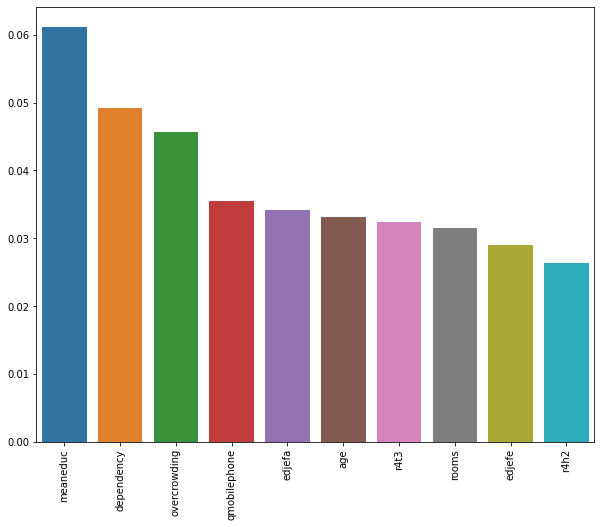

In [76]:
important_features = x.columns[cols_idx]
importance_values = rfc.feature_importances_[cols_idx]

plt.figure(figsize=(10, 8))
sns.barplot(important_features, importance_values)
plt.xticks(rotation = 90)
plt.show()

### Task 10: Check the accuracy using random forest with cross validation.

Lets try out cross validation with GridSearchCV to find best parameter for RandomForestClassifier

In [77]:
params = {'n_estimators': [100, 150, 200], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 4, 6]}

rfc_gscv = RandomForestClassifier(class_weight='balanced')
gscv = GridSearchCV(rfc_gscv, params, cv = 5, scoring='accuracy')

gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy')

In [78]:
best_rfc = gscv.best_estimator_

best_rfc

RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=200)

In [79]:
gscv.best_params_

{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}

In [80]:
print('Accuracy with best classifier', gscv.best_score_)

Accuracy with best classifier 0.8923809785697262


Lets train the model and test it.

In [81]:
best_rfc.fit(x_train, y_train)
y_pred = best_rfc.predict(x_test)

print('Accuracy score for RandomForestClassifier: ', accuracy_score(y_test, y_pred))

Accuracy score for RandomForestClassifier:  0.9247558874210224


Accuracy is almost the same.

Lets use the test dataset to predict.

In [82]:
IQ_test_df = pd.read_csv('test.csv')

IQ_test_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [83]:
# Drop columns
colsToDelete.update(['Id', 'idhogar', 'elimbasu5','v2a1', 'v18q1', 'rez_esc'])
IQ_test_df.drop(columns=colsToDelete, inplace=True, axis=1)

print(IQ_test_df.shape)

(23856, 116)


In [86]:
IQ_test_df['dependency'].replace(encode, inplace=True)
IQ_test_df['edjefe'].replace(encode, inplace=True)
IQ_test_df['edjefa'].replace(encode, inplace=True)

In [88]:
IQ_test_df['dependency'] = pd.to_numeric(IQ_test_df['dependency'])
IQ_test_df['edjefe'] = pd.to_numeric(IQ_test_df['edjefe'])
IQ_test_df['edjefa'] = pd.to_numeric(IQ_test_df['edjefa'])

In [90]:
IQ_test_df.dropna(inplace=True)
best_rfc.predict(IQ_test_df)

array([4, 4, 4, ..., 3, 3, 3])